<a href="https://colab.research.google.com/github/Keerthana301/RANK-FEATUES-OF-SMARTPHONE/blob/main/RankFeatuesSmartphone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/CNN/train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

df.info() #info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.describe() #describe

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
df.isnull().sum() #int type null

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
df.isnull() #checks each value

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
print (df.isnull().any()) #each column checked

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool


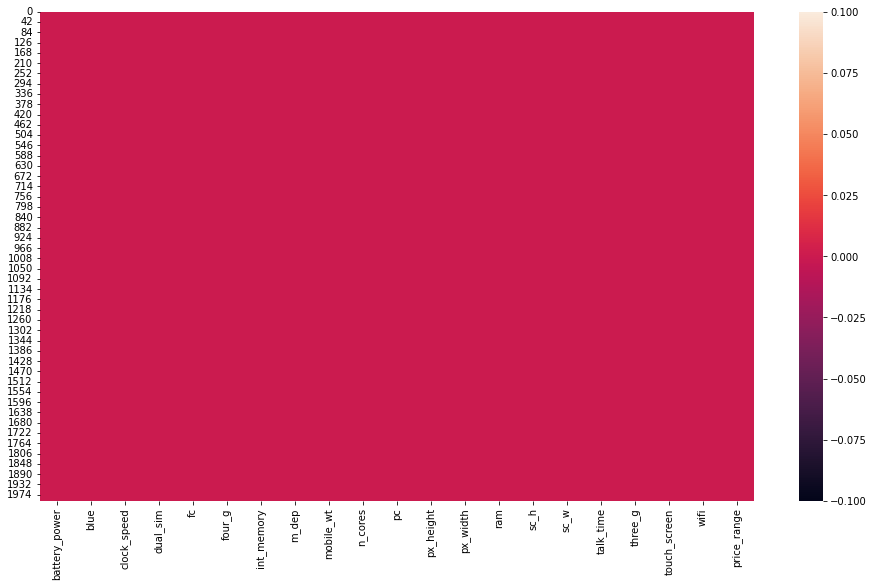

In [ ]:
plt.figure(figsize=(16,9)) #heatmap
sns.heatmap(df.isnull())
plt.show()

In [ ]:
correl = df.corr() #correlation matrix
correl.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998


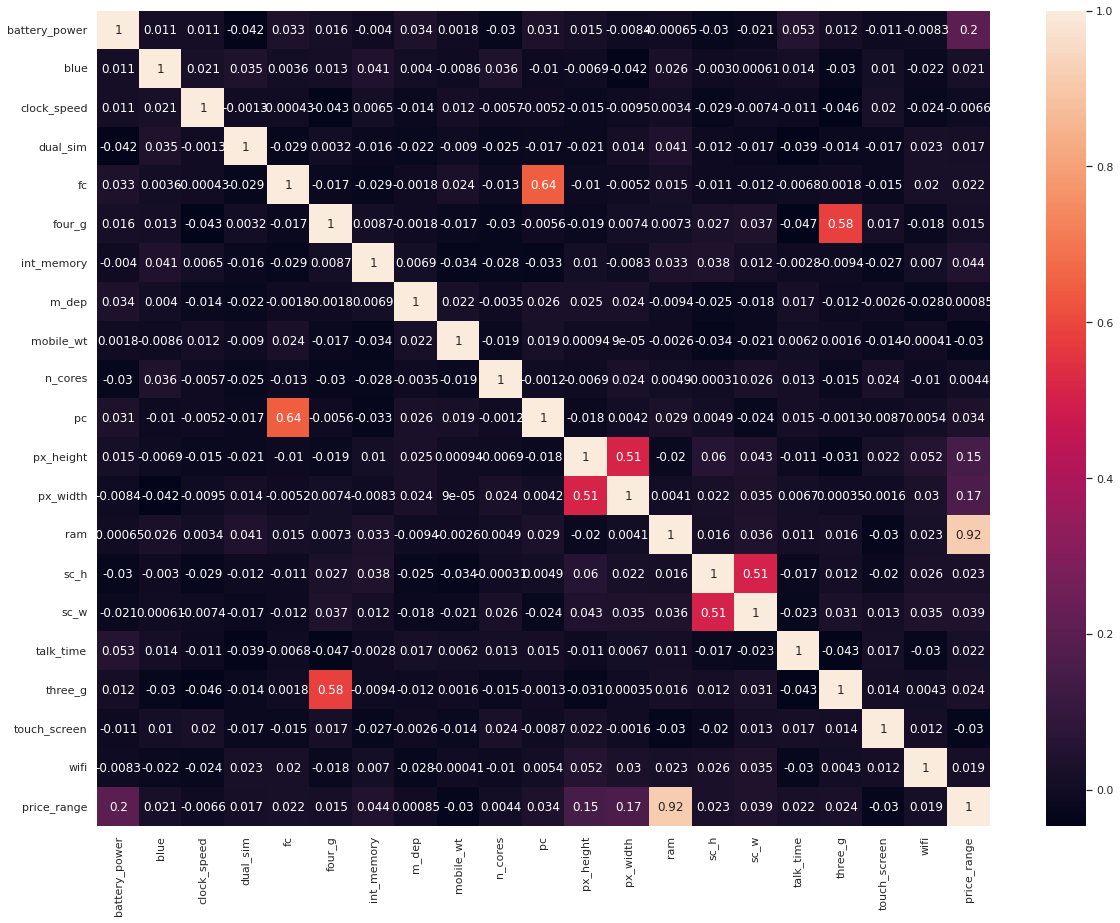

In [ ]:
sns.set(rc = {'figure.figsize':(20,15)}) #heatmap values
sns.heatmap(df.corr(),annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


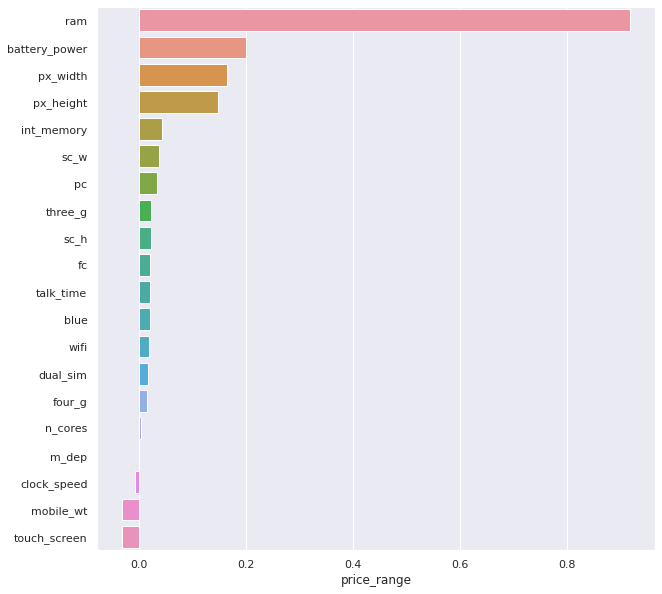

In [ ]:
sns.set(rc = {'figure.figsize':(10,10)}) #price range plot
correlation = correl['price_range'].sort_values(ascending = False)
corrpric = correlation[1:]
sns.barplot(corrpric,corrpric.index)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


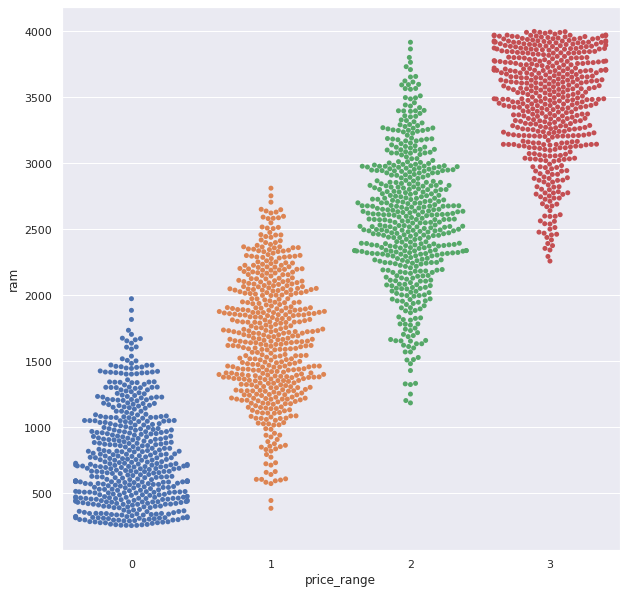

In [ ]:
sns.swarmplot(x = "price_range",y = "ram",data =df) #swarmplot
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


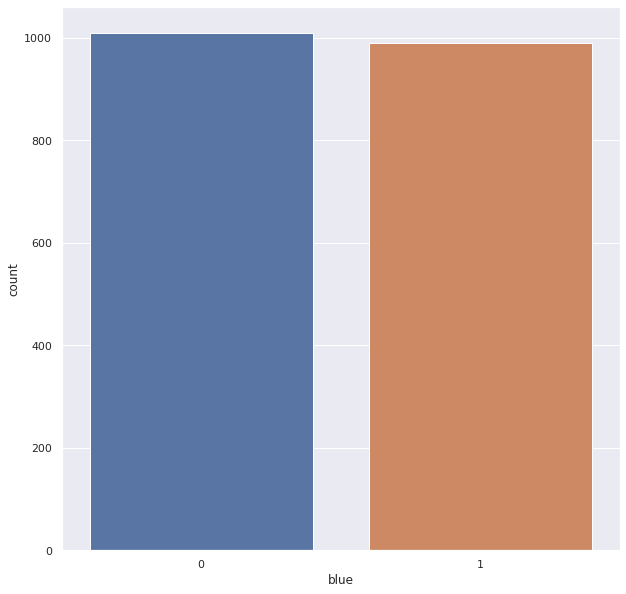

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


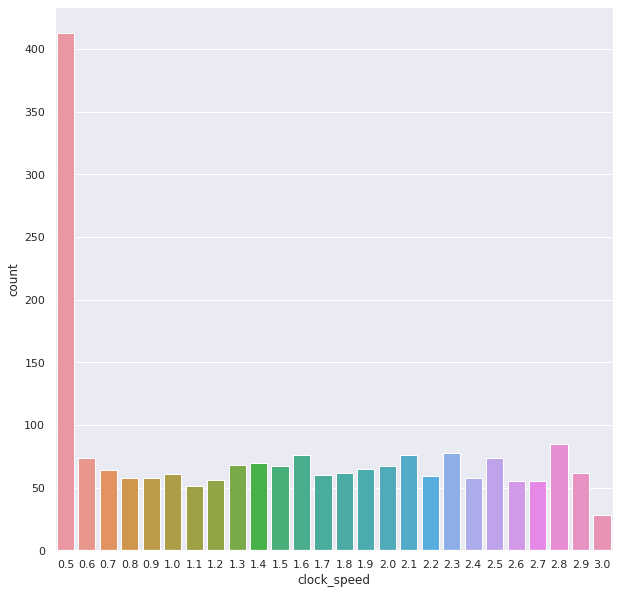

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


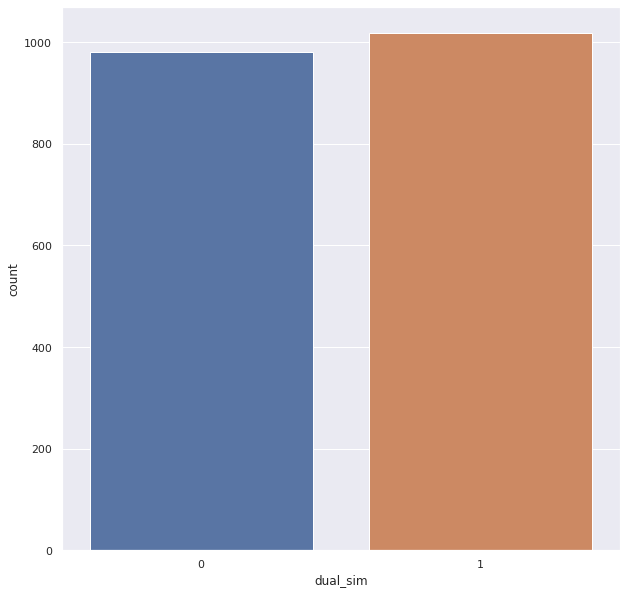

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


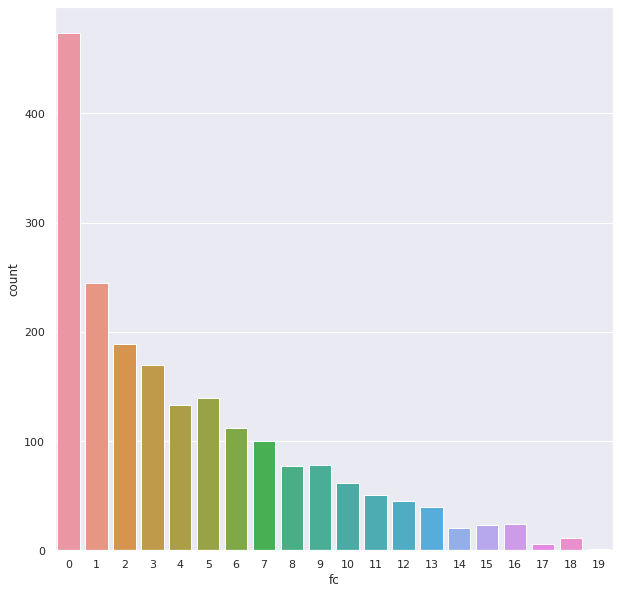

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


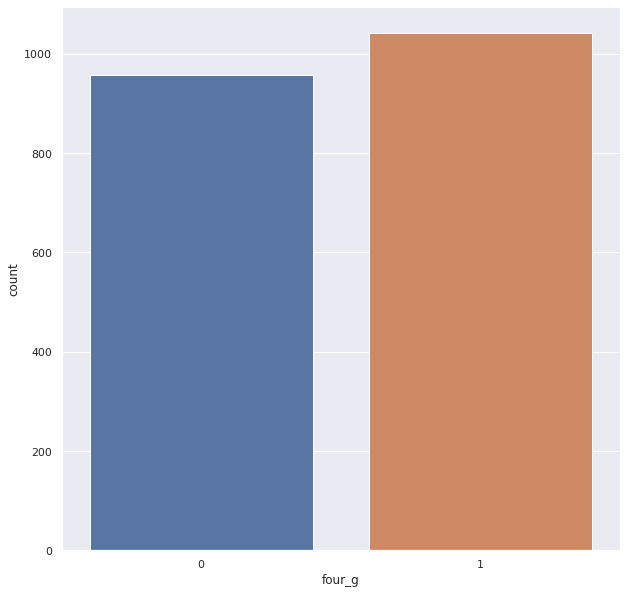

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


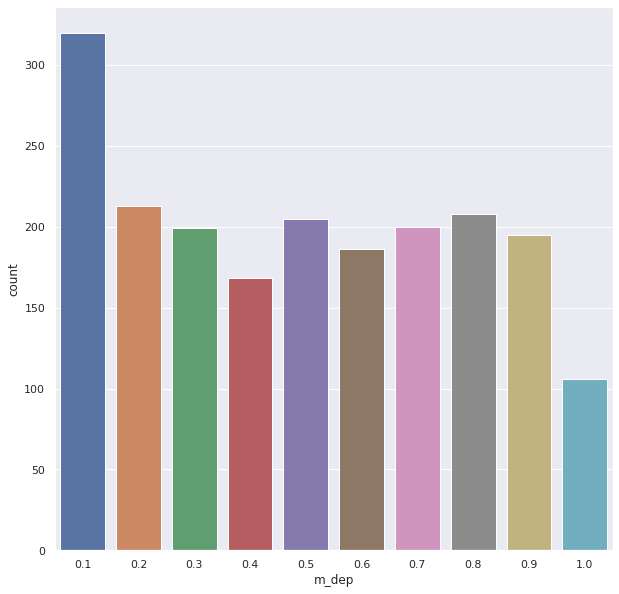

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


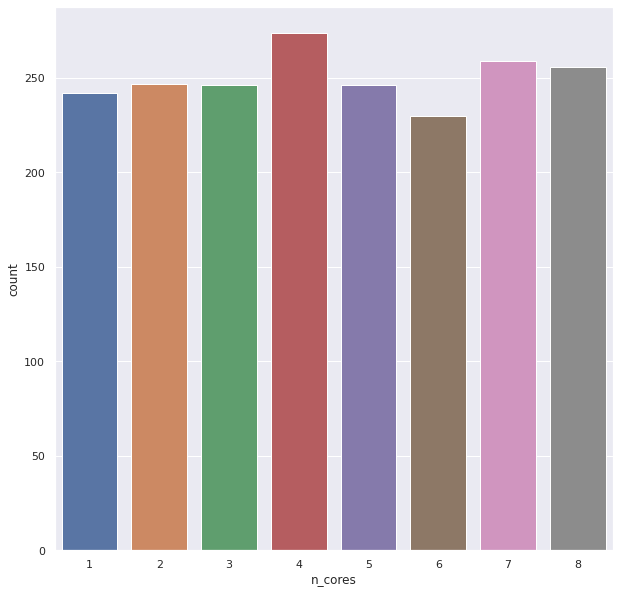

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


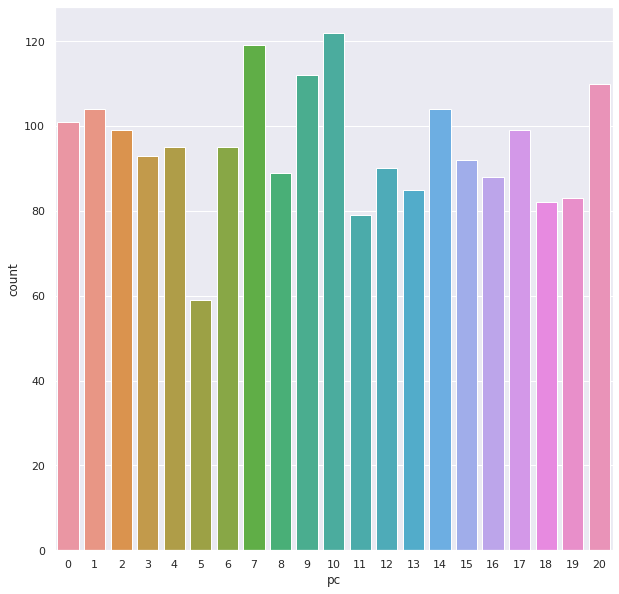

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


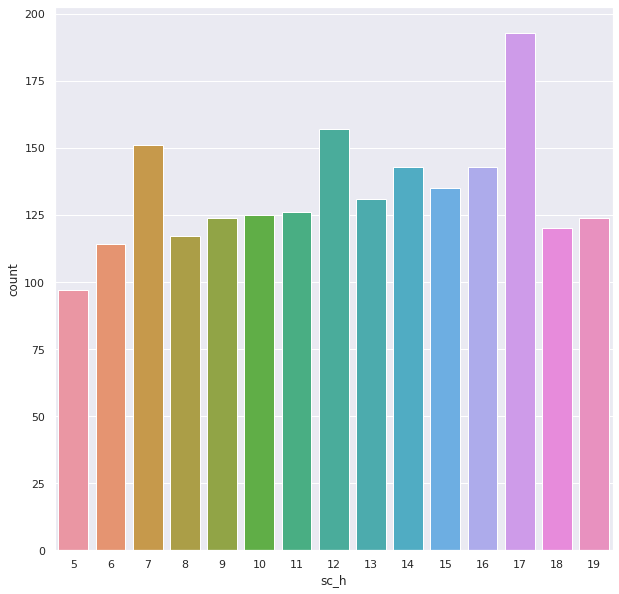

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


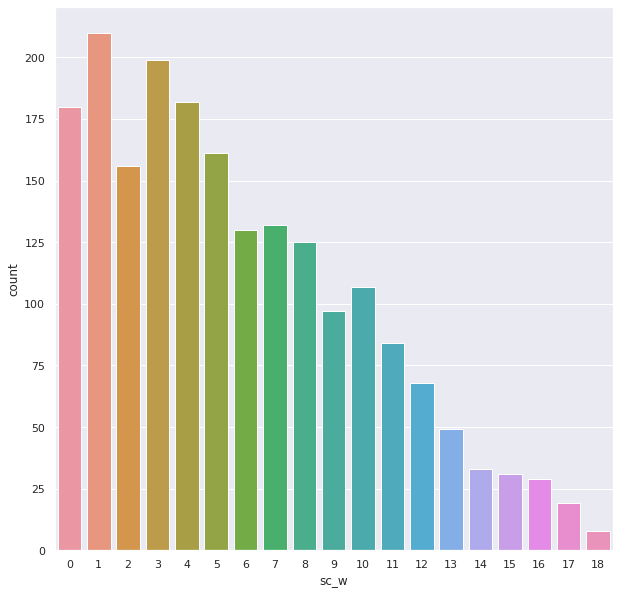

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


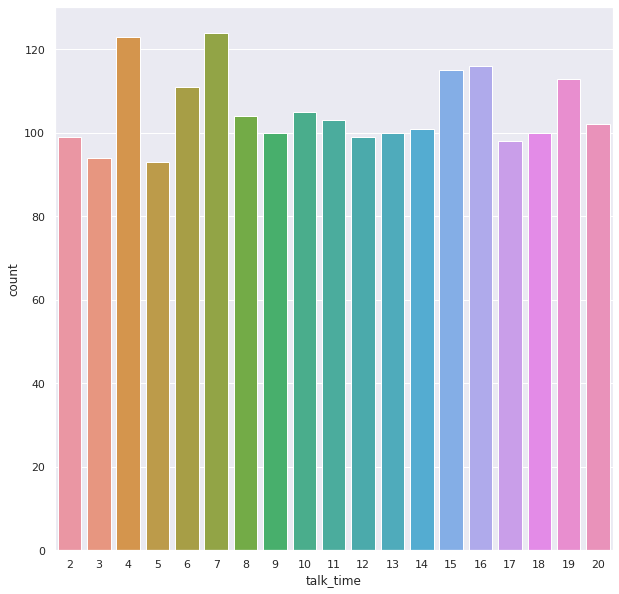

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


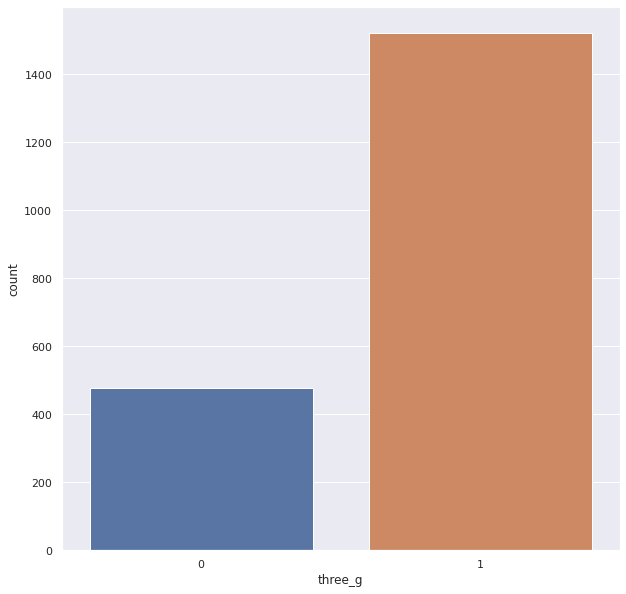

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


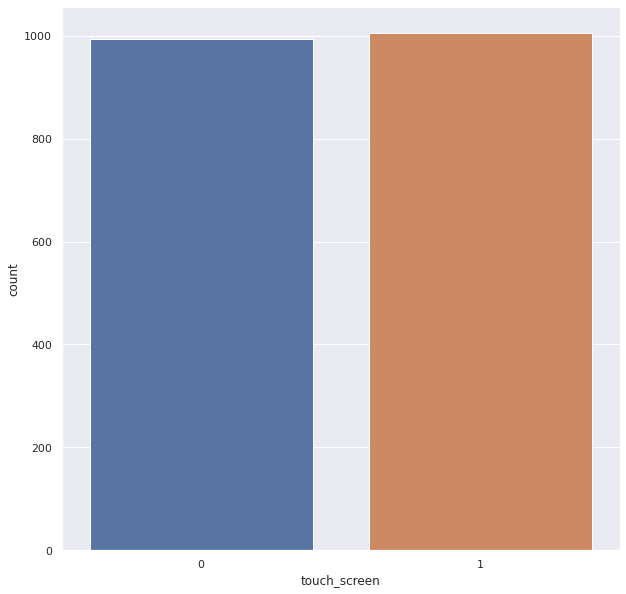

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


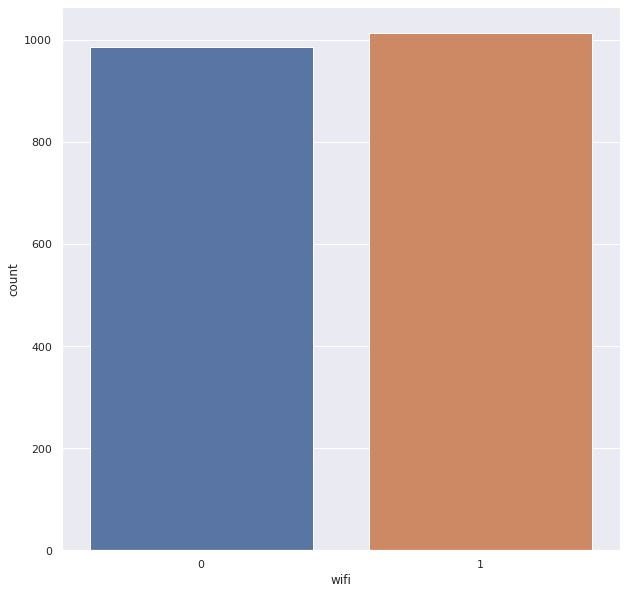

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


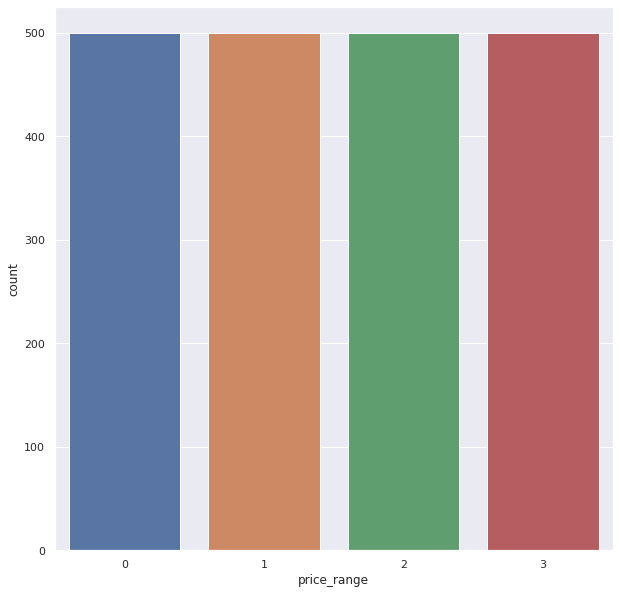

In [ ]:
for i in df:  #countplot
  if(df[i].nunique()<30):
    sns.countplot(df[i])
    plt.show()

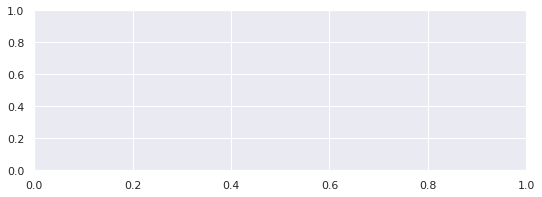

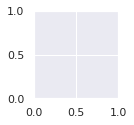

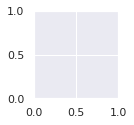

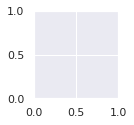

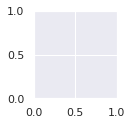

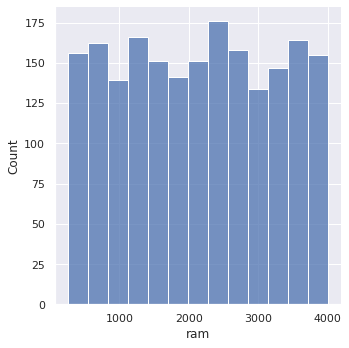

In [ ]:
plt.figure(figsize=(30,10)) #displot
plt.subplot(331)
sns.displot(df['talk_time'])
plt.subplot(331)
sns.displot(df['battery_power'])
plt.subplot(331)
sns.displot(df['int_memory'])
plt.subplot(331)
sns.displot(df['px_height'])
plt.subplot(331)
sns.displot(df['ram'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

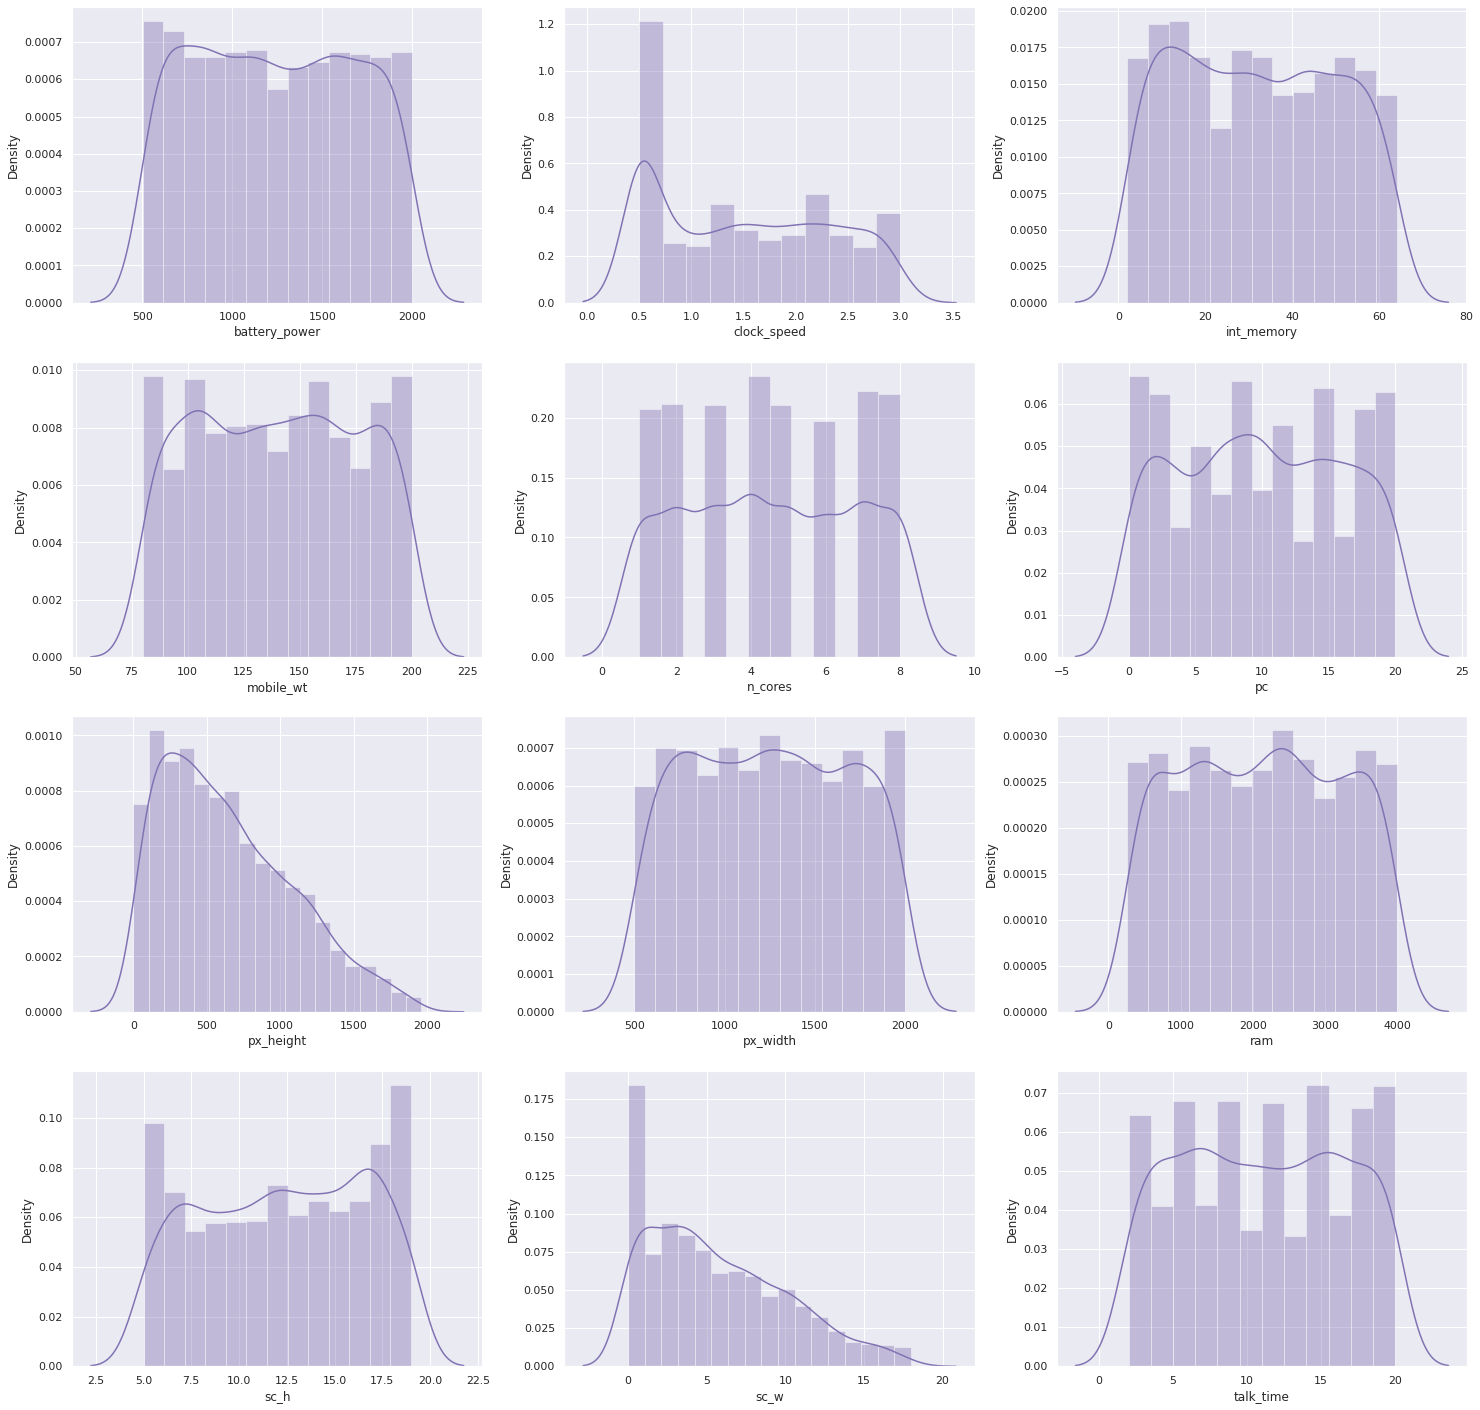

In [ ]:
hist_plot = ["battery_power","clock_speed","int_memory","mobile_wt","n_cores","pc","px_height","px_width",
            "ram","sc_h","sc_w","talk_time","price_range"]  #displot

fig,ax = plt.subplots(4,3, figsize = (25,25))

for i,j in zip(hist_plot,ax.flatten()):
    sns.distplot(df[i],ax = j, color="m")
plt.show();

In [ ]:
df['isBluetooth']=' '    #piechart
for i in range(len(df)):
  if df['blue'][i]==0:
    df['isBluetooth'][i]="NO"
  else:
    df['isBluetooth'][i]="YES"
px.pie(data_frame=df,names='isBluetooth',title='Percentage of devices having bluetooth',hole=0.2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


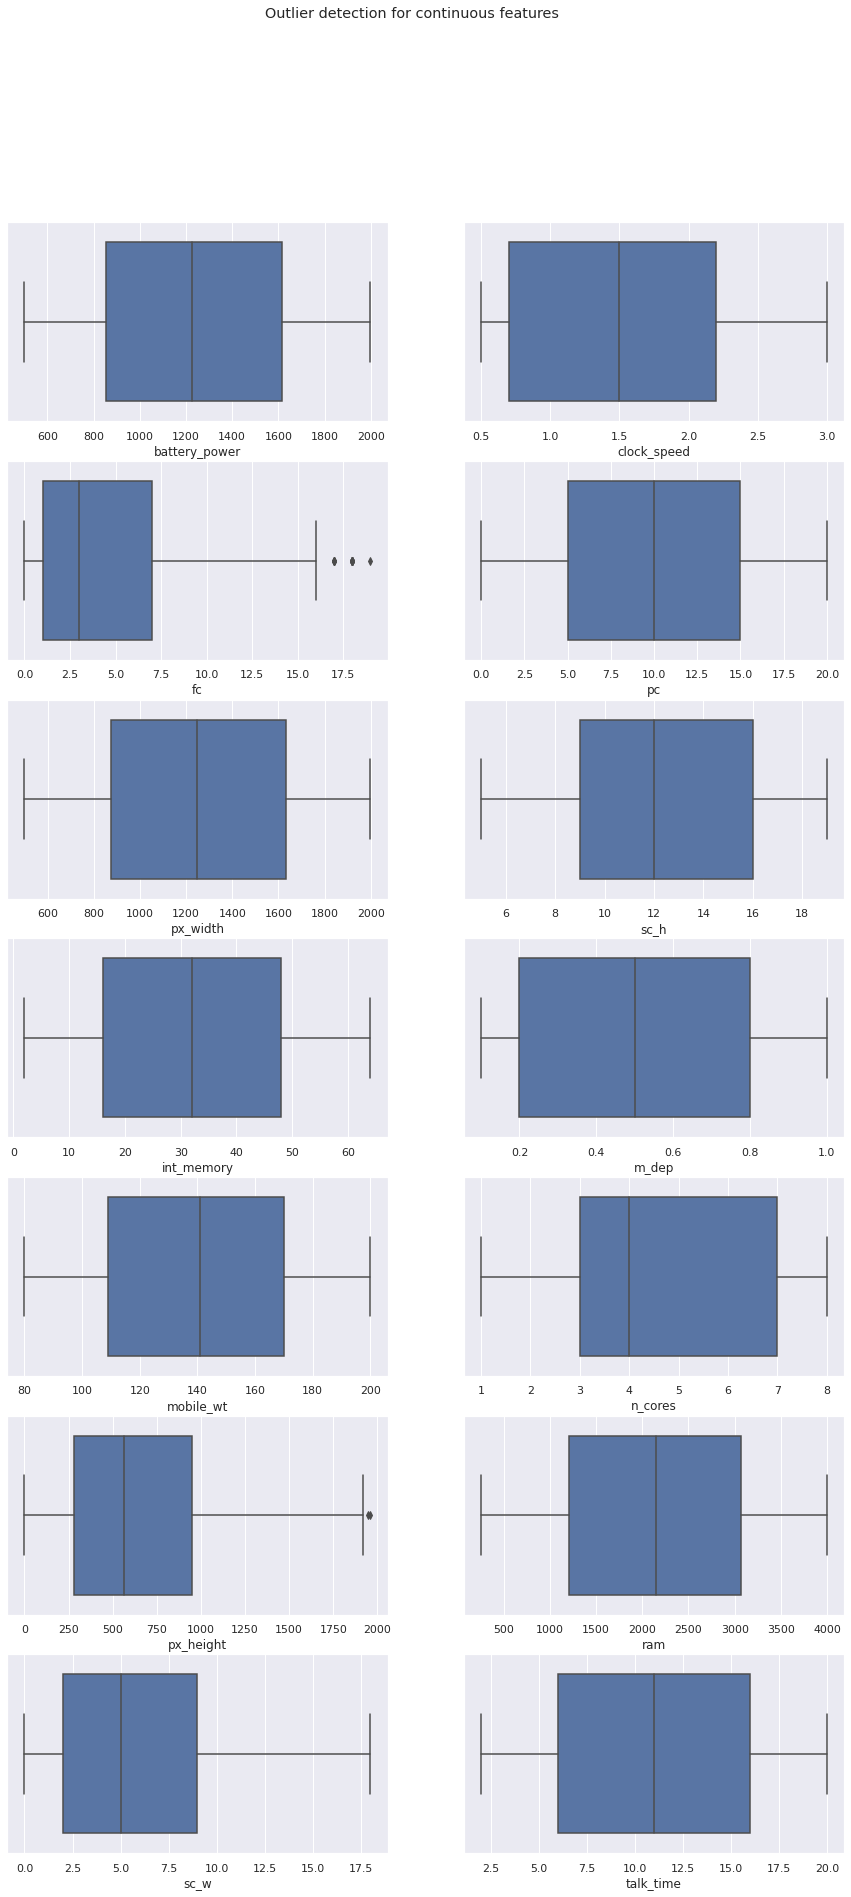

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=7, figsize=(15,30)) #boxplot
fig .suptitle("Outlier detection for continuous features")
sns.boxplot(x=df['battery_power'],ax=ax[0,0])
sns.boxplot(x=df['clock_speed'],ax=ax[0,1])
sns.boxplot(x=df['fc'],ax=ax[1,0])
sns.boxplot(x=df['pc'],ax=ax[1,1])
sns.boxplot(x=df['px_width'],ax=ax[2,0])
sns.boxplot(x=df['sc_h'],ax=ax[2,1])
sns.boxplot(x=df['int_memory'],ax=ax[3,0])
sns.boxplot(x=df['m_dep'],ax=ax[3,1])
sns.boxplot(x=df['mobile_wt'],ax=ax[4,0])
sns.boxplot(x=df['n_cores'],ax=ax[4,1])
sns.boxplot(x=df['px_height'],ax=ax[5,0])
sns.boxplot(x=df['ram'],ax=ax[5,1])
sns.boxplot(x=df['sc_w'],ax=ax[6,0])
sns.boxplot(x=df['talk_time'],ax=ax[6,1])
plt.show()

In [ ]:
px.histogram(data_frame=df,x='isBluetooth',color='price_range',title='Comparison of devices having bluetooth or not') # histogram

In [ ]:
px.histogram(data_frame=df,x='dual_sim',color='price_range',title='Comparison of devices having dual sim or not')

In [ ]:
px.histogram(data_frame=df,x='touch_screen',color='price_range',title='Comparison of devices having touch screen or not')

In [ ]:
px.histogram(data_frame=df,x='n_cores',color='price_range',title='Comparison of devices having different cores or')

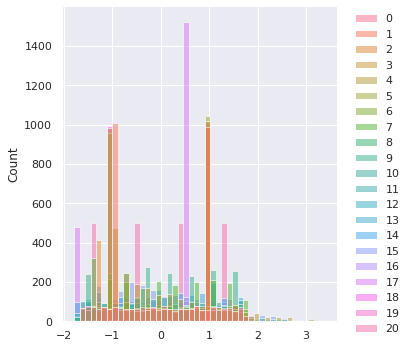

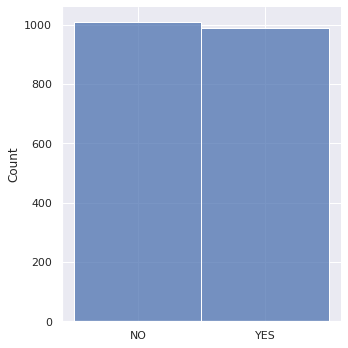

In [ ]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X=sc_x.fit_transform(X)

from sklearn.model_selection import train_test_split #splitting train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

sns.displot(X)
sns.displot(y)

In [ ]:
from sklearn.linear_model import LogisticRegression #Logistic Regression
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)
logmodel.score(X_train,y_train) # train score

1.0

In [ ]:
logmodel.coef_

array([[ 4.30118164e-03,  5.63808175e+00,  1.10806782e-02,
         3.03293871e-02,  3.67001574e-02,  3.59118330e-02,
         2.97507094e-02, -4.46792461e-04, -8.04306314e-03,
         3.15498133e-02, -1.30768361e-02,  6.00480071e-03,
        -4.49265678e-02,  7.46993215e-03, -6.83289992e-03,
         1.37565849e-02,  1.91157369e-03, -4.29539850e-02,
         2.37039818e-02, -1.27139498e-02,  2.74350035e-02]])

In [ ]:
logmodel.intercept_

array([-0.0752982])

In [ ]:
X_test[0,:]

array([ 0.49050173,  1.0100505 , -1.2530642 ,  0.98117712, -0.76249466,
       -1.04396559,  0.10768319,  0.68754816, -1.61762361, -0.22756439,
       -1.14080978, -0.89054507, -0.50571594,  1.19394539, -1.25979551,
       -0.17610693, -1.10039396,  0.55964063,  0.99401789, -1.01409939,
        1.34164079])

In [ ]:
logmodel.predict([X_test[0,:]])

array(['YES'], dtype=object)

In [ ]:
y_pred = logmodel.predict(X_test) #Test score
logmodel.score(X_test,y_test)

1.0

In [ ]:
lrc = confusion_matrix(y_test, y_pred) #confusion matrix  for logisticRegression
lrc

array([[182,   0],
       [  0, 218]])

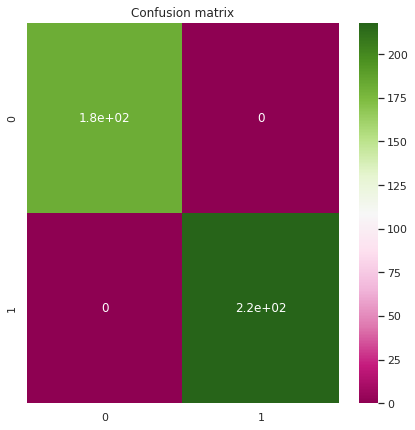

In [ ]:
sns.set(rc = {'figure.figsize':(7,7)}) #heatmap for logistic regression
sns.heatmap(lrc, annot=True,cmap="PiYG")
plt.title("Confusion matrix")
plt.show()

In [ ]:
resultlogmodel = classification_report(y_test,y_pred)
print(resultlogmodel) #final result for logistic regression

              precision    recall  f1-score   support

          NO       1.00      1.00      1.00       182
         YES       1.00      1.00      1.00       218

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [ ]:
from sklearn.ensemble import RandomForestClassifier #Random forest classifier
Random = RandomForestClassifier(max_depth=8, random_state=51)
Random.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, random_state=51)

In [ ]:
X_test[0,:]

array([ 0.49050173,  1.0100505 , -1.2530642 ,  0.98117712, -0.76249466,
       -1.04396559,  0.10768319,  0.68754816, -1.61762361, -0.22756439,
       -1.14080978, -0.89054507, -0.50571594,  1.19394539, -1.25979551,
       -0.17610693, -1.10039396,  0.55964063,  0.99401789, -1.01409939,
        1.34164079])

In [ ]:
Random.predict([X_test[0,:]]) #predict the X_test 

array(['YES'], dtype=object)

In [ ]:
y_pred = Random.predict(X_test)
Random.score(X_test,y_test) #y prediction using x test

1.0

In [ ]:
rfc = confusion_matrix(y_test, y_pred) #confusion matrix of random forest classifier
rfc

array([[182,   0],
       [  0, 218]])

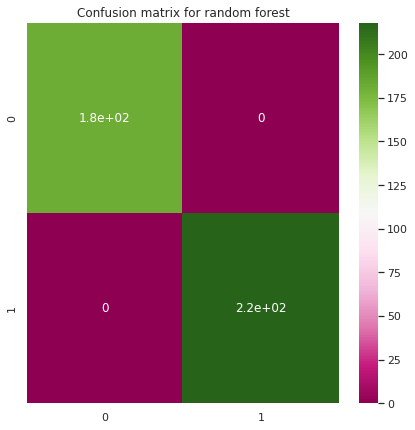

In [ ]:
sns.set(rc = {'figure.figsize':(7,7)})
sns.heatmap(rfc, annot=True,cmap="PiYG") #heatmap of classifier

plt.title("Confusion matrix for random forest")
plt.show()

In [ ]:
resultrandom = classification_report(y_test,y_pred) #result of classifier
print(resultrandom)

              precision    recall  f1-score   support

          NO       1.00      1.00      1.00       182
         YES       1.00      1.00      1.00       218

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [ ]:
from sklearn.neighbors import KNeighborsClassifier #knn
knn = KNeighborsClassifier(n_neighbors=15 )
knn.fit(X_train,y_train)
knn.score(X_train,y_train)

0.99625

In [ ]:
y_pred = knn.predict(X_test) #predict x_test
knn.score(X_test,y_test)

0.9875

In [ ]:
knnc = confusion_matrix(y_test, y_pred) #confusion matrix of knn
knnc

array([[181,   1],
       [  4, 214]])

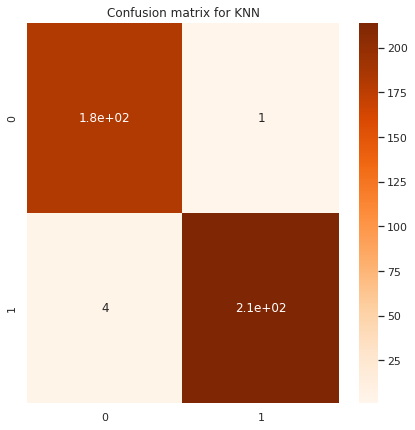

In [ ]:
sns.set(rc = {'figure.figsize':(7,7)})
sns.heatmap(knnc, annot=True,cmap = 'Oranges') #heatmap for knn
plt.title("Confusion matrix for KNN")
plt.show()

In [ ]:
resultknn = classification_report(y_test,y_pred) #result of knn
print(resultknn)

              precision    recall  f1-score   support

          NO       0.98      0.99      0.99       182
         YES       1.00      0.98      0.99       218

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [ ]:
from sklearn import tree # decision tree
dt = tree.DecisionTreeClassifier(random_state=0,max_depth = 10)
dt.fit(X_train,y_train)
dt.score(X_train,y_train)

1.0

In [ ]:
y_pred = dt.predict(X_test)
dt.score(X_test,y_test)

1.0

In [ ]:
dtc = confusion_matrix(y_test, y_pred ) #confusion matrix of decision tree
dtc

array([[182,   0],
       [  0, 218]])

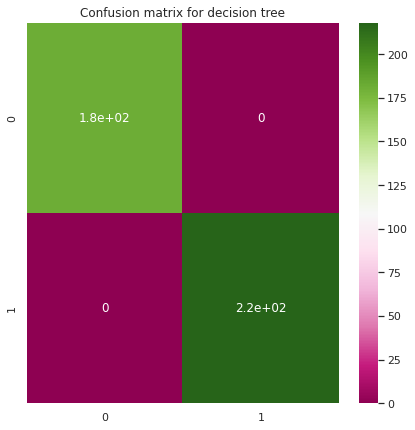

In [ ]:
sns.set(rc = {'figure.figsize':(7,7)})
sns.heatmap(dtc, annot=True,cmap="PiYG") #heatmap of decision tree
plt.title("Confusion matrix for decision tree")
plt.show()

In [ ]:
resultdt = classification_report(y_test,y_pred) #result of decision tree
print(resultdt)

              precision    recall  f1-score   support

          NO       1.00      1.00      1.00       182
         YES       1.00      1.00      1.00       218

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [ ]:
from sklearn.naive_bayes import GaussianNB #naive bayes
nb = GaussianNB()
nb.fit(X_train,y_train)
nb.score(X_train,y_train)

1.0

In [ ]:
y_pred = nb.predict(X_test)
nb.score(X_test,y_test)

1.0

In [ ]:
nbc = confusion_matrix(y_test, y_pred ) #confusion matrix of naive bayes
nbc

array([[182,   0],
       [  0, 218]])

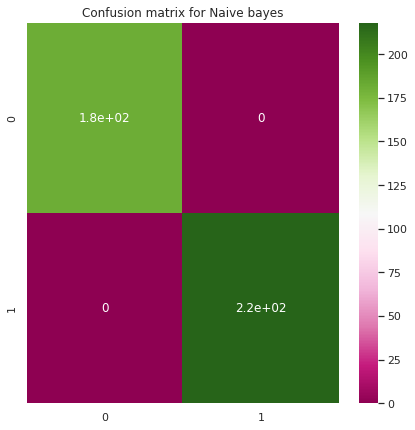

In [ ]:
sns.set(rc = {'figure.figsize':(7,7)})
sns.heatmap(nbc, annot=True,cmap="PiYG") #heatmap of naive bayes
plt.title("Confusion matrix for Naive bayes")
plt.show()

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel = "rbf")
svc.fit(X_train,y_train)
svc.score(X_train,y_train)

1.0

In [ ]:
y_pred = svc.predict(X_test)
svc.score(X_test,y_test)

1.0

In [ ]:
import xgboost as xgb #xgboost classifier
xgb = xgb.XGBClassifier()
xgb.fit(X_train,y_train)
xgb.score(X_train,y_train)

1.0

In [ ]:
xgbc = confusion_matrix(y_test, y_pred) #confusion matrix of xgboost
xgbc

array([[182,   0],
       [  0, 218]])

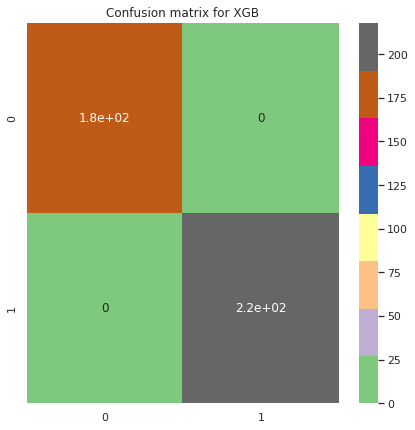

In [ ]:
sns.set(rc = {'figure.figsize':(7,7)})
sns.heatmap(xgbc, annot=True,cmap ='Accent') #heatmap of xgboost
plt.title("Confusion matrix for XGB")
plt.show()

In [ ]:
resultxgb = classification_report(y_test,y_pred) #result of xg boost
print(resultxgb)

              precision    recall  f1-score   support

          NO       1.00      1.00      1.00       182
         YES       1.00      1.00      1.00       218

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [ ]:
from sklearn.model_selection import cross_validate
#model = VotingRegressor
crossval = cross_validate(dt, X, y, cv=10, scoring = "r2" , return_train_score=True)
crossval['test_score'].mean(), crossval['train_score'].mean()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)

(nan, nan)

In [ ]:
from sklearn.model_selection import cross_val_score
#model = VotingRegressor
crossval = cross_validate(logmodel, X, y, cv=10, scoring = "r2" , return_train_score=True)
crossval['test_score'].mean(), crossval['train_score'].mean()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py", line 95, in _check_reg_targets
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)

(nan, nan)

In [ ]:
dt2 = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/CNN/train.csv") #Ranking on all the features using rank()
RankedDataset1 = dt2.rank()
RankedDataset1.sort_values(by="price_range")

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1838,320.5,1505.5,638.5,1491.0,1853.0,1479.0,432.0,1595.5,1414.5,872.5,...,657.5,978.0,445.5,1214.0,1284.5,146.5,1239.0,1497.5,493.5,250.5
1762,435.5,1505.5,207.0,1491.0,993.5,479.0,1451.5,1003.0,436.0,1872.5,...,189.0,45.0,442.0,1353.0,1008.0,901.0,1239.0,497.5,1493.5,250.5
419,589.0,1505.5,638.5,491.0,814.0,479.0,77.5,1595.5,325.5,366.0,...,329.5,1341.0,306.0,791.5,1284.5,363.0,1239.0,1497.5,493.5,250.5
846,1323.5,505.5,1612.5,1491.0,1601.0,479.0,1011.0,1198.5,1991.0,121.5,...,288.0,408.0,292.0,287.0,1153.5,696.5,239.0,497.5,493.5,250.5
845,1875.0,505.5,1337.0,491.0,1895.5,479.0,1727.0,1797.0,436.0,1615.0,...,1231.5,1363.0,16.0,1214.0,836.5,1636.5,1239.0,497.5,1493.5,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,753.0,1505.5,1868.0,1491.0,237.5,1479.0,1828.5,427.0,325.5,1872.5,...,455.0,728.0,1919.0,1660.0,1797.5,798.5,1239.0,1497.5,1493.5,1750.5
982,737.5,505.5,450.5,1491.0,814.0,1479.0,1382.0,1003.0,309.0,612.5,...,419.5,1937.0,1732.0,1214.0,1008.0,1106.0,1239.0,1497.5,493.5,1750.5
987,1583.0,505.5,1678.5,491.0,237.5,1479.0,669.5,427.0,1496.0,1615.0,...,1134.0,481.5,1994.0,1660.0,1897.0,696.5,1239.0,1497.5,1493.5,1750.5
956,515.5,505.5,1544.5,491.0,1678.5,1479.0,142.0,160.5,472.5,1872.5,...,1371.0,1966.0,1703.5,541.5,836.5,798.5,1239.0,1497.5,1493.5,1750.5


In [ ]:
b = dt2 #Ranking all the features separately to correct output
b["rank_by_price"] = b["price_range"].rank()
b["rank_by_battery"] = b["battery_power"].rank(ascending=False)
b["rank_by_blueooth"] = b["blue"].rank(ascending=False)
b["rank_by_clockspeed"] = b["clock_speed"].rank(ascending=False)
b["rank_by_DualSIM"] = b["dual_sim"].rank(ascending=False)
b["rank_by_fc"] = b["fc"].rank(ascending=False)
b["rank_by_4G"] = b["four_g"].rank(ascending=False)
b["rank_by_InternalMemory"] = b["int_memory"].rank(ascending=False)
b["rank_by_mdep"] = b["m_dep"].rank(ascending=False)
b["rank_by_weight"] = b["mobile_wt"].rank(ascending=True)
b["rank_by_ncores"] = b["n_cores"].rank(ascending=False)
b["rank_by_pc"] = b["pc"].rank(ascending=False)
b["rank_by_height"] = b["px_height"].rank(ascending=False)
b["rank_by_width"] = b["px_width"].rank(ascending=False)
b["rank_by_ram"] = b["ram"].rank(ascending=False)
b["rank_by_sch"] = b["sc_h"].rank(ascending=False)
b["rank_by_scw"] = b["sc_w"].rank(ascending=False)
b["rank_by_talktime"] = b["talk_time"].rank(ascending=False)
b["rank_by_3G"] = b["three_g"].rank(ascending=False)
b["rank_by_touchscreen"] = b["touch_screen"].rank(ascending=False)
b["rank_by_wifi"] = b["wifi"].rank(ascending=False)
b.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,...,1746.0,1972.5,1664.5,762.5,1459.5,716.5,159.0,1762.0,1503.5,507.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1402.0,545.5,17.0,714.0,341.0,1355.0,1418.5,762.0,503.5,1507.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1402.0,212.0,386.5,732.0,1209.5,1532.5,1202.5,762.0,503.5,1507.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1090.5,250.0,287.0,639.0,509.0,588.0,996.0,762.0,1503.5,1507.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,606.5,261.5,1054.0,1375.0,1580.0,1532.5,587.0,762.0,503.5,1507.5


In [ ]:
RankedDataset2 = b.iloc[:,21:] #21 columns specified
RankedDataset2

,rank_by_price,rank_by_battery,rank_by_blueooth,rank_by_clockspeed,rank_by_DualSIM,rank_by_fc,rank_by_4G,rank_by_InternalMemory,rank_by_mdep,rank_by_weight,...,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,750.5,1512.5,1495.5,525.0,1510.0,1404.0,1522.0,1820.5,802.5,1783.5,...,1746.0,1972.5,1664.5,762.5,1459.5,716.5,159.0,1762.0,1503.5,507.5
1,1250.5,1278.5,495.5,1794.0,510.0,1763.5,522.0,334.5,609.5,932.5,...,1402.0,545.5,17.0,714.0,341.0,1355.0,1418.5,762.0,503.5,1507.5
2,1250.5,1909.5,495.5,1794.0,510.0,1187.0,522.0,720.0,204.0,1069.0,...,1402.0,212.0,386.5,732.0,1209.5,1532.5,1202.5,762.0,503.5,1507.5
3,1250.5,1830.0,495.5,322.5,1510.0,1763.5,1522.0,1710.5,405.5,846.0,...,1090.5,250.0,287.0,639.0,509.0,588.0,996.0,762.0,1503.5,1507.5
4,750.5,242.0,495.5,1193.5,1510.0,105.5,522.0,619.0,802.5,1006.0,...,606.5,261.5,1054.0,1375.0,1580.0,1532.5,587.0,762.0,503.5,1507.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,250.5,1587.5,495.5,1794.0,510.0,1763.5,522.0,1979.5,405.5,456.0,...,606.5,244.5,163.0,1767.0,924.0,1164.5,159.0,762.0,503.5,1507.5
1996,1250.5,58.0,495.5,258.0,510.0,1763.5,1522.0,784.5,1574.0,1766.5,...,1650.0,536.0,54.5,1062.0,1209.5,375.0,471.5,762.0,503.5,507.5
1997,1750.5,121.5,1495.5,1362.5,510.0,1404.0,522.0,860.0,609.5,486.5,...,1650.0,583.5,502.0,504.0,1459.5,1715.5,1638.0,762.0,503.5,1507.5
1998,250.5,648.0,1495.5,1362.5,1510.0,856.0,522.0,549.5,1840.5,1069.0,...,1479.0,1395.5,1792.5,1664.5,184.5,375.0,159.0,762.0,503.5,507.5
